<a href="https://colab.research.google.com/github/Emma-Cap/Deep-Learning-finale/blob/main/DeepLearning_PROGETTP_COCCO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import fiftyone as fo
import fiftyone.zoo as foz


In [5]:
# Crea una directory per il dataset
!mkdir -p /content/coco

# Naviga nella directory creata
%cd /content/coco

# Scarica le immagini di training (~18GB)
!wget http://images.cocodataset.org/zips/train2017.zip

# Scarica le annotazioni (~241MB)
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip


/content/coco
--2024-11-09 09:45:33--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.8.181, 3.5.30.241, 54.231.230.145, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.8.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  37.6MB/s    in 7m 1s   

2024-11-09 09:52:35 (43.8 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2024-11-09 09:52:35--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.0.10, 3.5.29.24, 3.5.25.242, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.0.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva

In [10]:
# Estrai le immagini di training
!unzip -q train2017.zip

# Estrai le annotazioni
!unzip -q annotations_trainval2017.zip


ANALISI ESPLORATIVA DEL DATASET

In [11]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image


In [12]:
# Percorso al file delle annotazioni
annotations_path = '/content/coco/annotations/instances_train2017.json'

# Carica le annotazioni
with open(annotations_path, 'r') as f:
    coco = json.load(f)


In [13]:
# Estrai le categorie
categories = coco['categories']
categories_df = pd.DataFrame(categories)

print("Numero di categorie:", len(categories_df))
print(categories_df[['id', 'name']])


Numero di categorie: 80
    id        name
0    1      person
1    2     bicycle
2    3         car
3    4  motorcycle
4    5    airplane
..  ..         ...
75  86        vase
76  87    scissors
77  88  teddy bear
78  89  hair drier
79  90  toothbrush

[80 rows x 2 columns]


In [14]:
images = coco['images']
print("Numero totale di immagini:", len(images))
annotations = coco['annotations']
print("Numero totale di annotazioni:", len(annotations))


Numero totale di immagini: 118287
Numero totale di annotazioni: 860001


In [15]:
# Conta le occorrenze di ciascuna categoria
category_counts = Counter([ann['category_id'] for ann in annotations])

# Mappa gli ID delle categorie ai nomi
category_id_to_name = {cat['id']: cat['name'] for cat in categories}

# Crea un DataFrame per visualizzare i risultati
category_counts_df = pd.DataFrame([
    {'Categoria': category_id_to_name[cat_id], 'Conteggio': count}
    for cat_id, count in category_counts.items()
])

# Ordina per conteggio
category_counts_df = category_counts_df.sort_values('Conteggio', ascending=False)

print(category_counts_df.head(10))  # Mostra le prime 10 categorie


        Categoria  Conteggio
20         person     262465
14            car      43867
11          chair      38491
70           book      24715
9          bottle      24342
48            cup      20650
12   dining table      15714
52           bowl      14358
32  traffic light      12884
76        handbag      12354


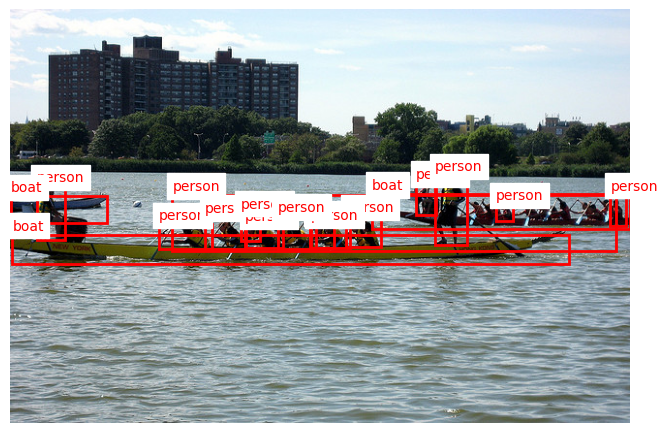

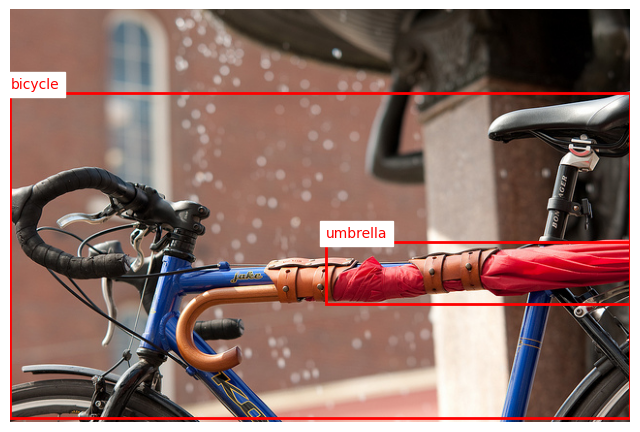

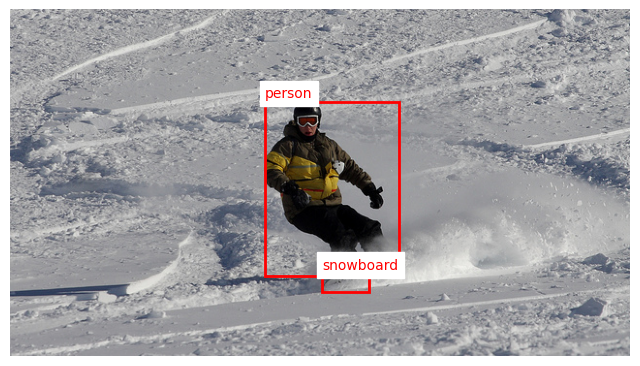

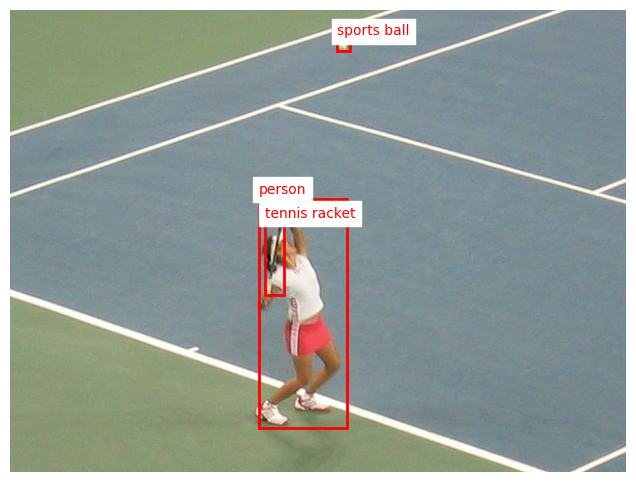

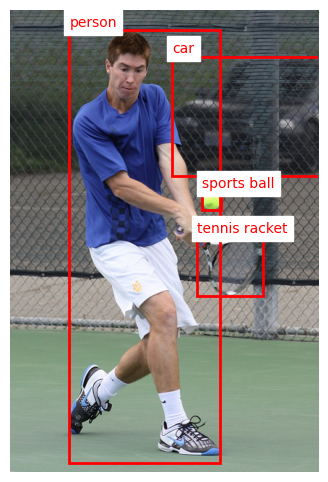

In [17]:
import random

# Seleziona casualmente alcune immagini
sample_images = random.sample(images, 5)

for img_info in sample_images:
    img_id = img_info['id']
    img_file_name = img_info['file_name']
    img_path = os.path.join('/content/coco/train2017', img_file_name)

    # Carica l'immagine
    img = Image.open(img_path)

    # Ottieni le annotazioni per questa immagine
    img_annotations = [ann for ann in annotations if ann['image_id'] == img_id]

    # Visualizza l'immagine
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')

    # Aggiungi i bounding box
    ax = plt.gca()
    for ann in img_annotations:
        bbox = ann['bbox']  # [x, y, width, height]
        category_id = ann['category_id']
        category_name = category_id_to_name[category_id]

        rect = plt.Rectangle(
            (bbox[0], bbox[1]),
            bbox[2],
            bbox[3],
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        plt.text(
            bbox[0],
            bbox[1] - 5,
            category_name,
            fontsize=10,
            color='red',
            backgroundcolor='white'
        )

    plt.show()


In [18]:
# Estrai le dimensioni delle immagini
image_sizes = [(img['width'], img['height']) for img in images]
image_sizes_df = pd.DataFrame(image_sizes, columns=['Larghezza', 'Altezza'])

print("Statistiche delle dimensioni delle immagini:")
print(image_sizes_df.describe())


Statistiche delle dimensioni delle immagini:
           Larghezza        Altezza
count  118287.000000  118287.000000
mean      577.712065     484.098895
std        91.884340      97.089573
min        59.000000      51.000000
25%       500.000000     426.000000
50%       640.000000     480.000000
75%       640.000000     513.000000
max       640.000000     640.000000


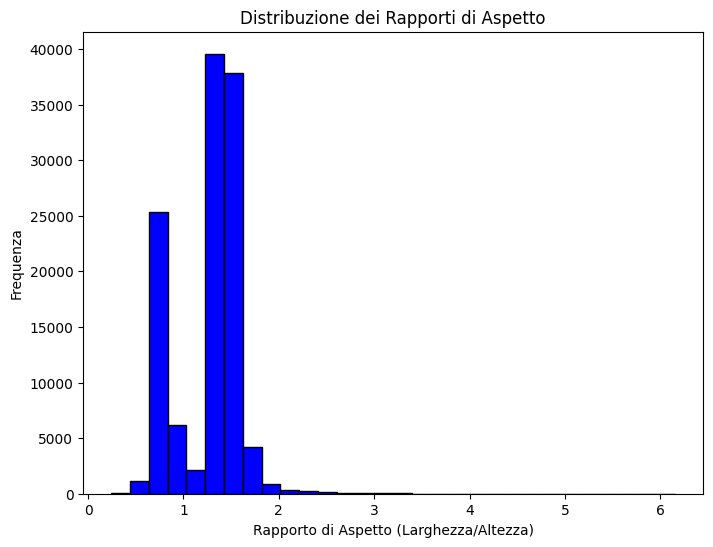

In [19]:
# Calcola il rapporto di aspetto
image_sizes_df['Rapporto di Aspetto'] = image_sizes_df['Larghezza'] / image_sizes_df['Altezza']

# Istogramma dei rapporti di aspetto
plt.figure(figsize=(8, 6))
plt.hist(image_sizes_df['Rapporto di Aspetto'], bins=30, color='blue', edgecolor='black')
plt.xlabel('Rapporto di Aspetto (Larghezza/Altezza)')
plt.ylabel('Frequenza')
plt.title('Distribuzione dei Rapporti di Aspetto')
plt.show()


In [20]:
# Mappa degli ID delle immagini alle categorie presenti
image_id_to_categories = {}

for ann in annotations:
    img_id = ann['image_id']
    cat_id = ann['category_id']
    if img_id not in image_id_to_categories:
        image_id_to_categories[img_id] = set()
    image_id_to_categories[img_id].add(cat_id)

# Conta quante immagini contengono ciascuna categoria
category_image_counts = Counter()

for cat_ids in image_id_to_categories.values():
    for cat_id in cat_ids:
        category_image_counts[cat_id] += 1

# Crea un DataFrame
category_image_counts_df = pd.DataFrame([
    {'Categoria': category_id_to_name[cat_id], 'Numero di Immagini': count}
    for cat_id, count in category_image_counts.items()
])

# Ordina per numero di immagini
category_image_counts_df = category_image_counts_df.sort_values('Numero di Immagini', ascending=False)

print(category_image_counts_df.head(10))  # Mostra le prime 10 categorie


       Categoria  Numero di Immagini
0         person               64115
27         chair               12774
7            car               12251
1   dining table               11837
3            cup                9189
2         bottle                8501
14          bowl                7111
10       handbag                6841
30         truck                6127
32         bench                5570


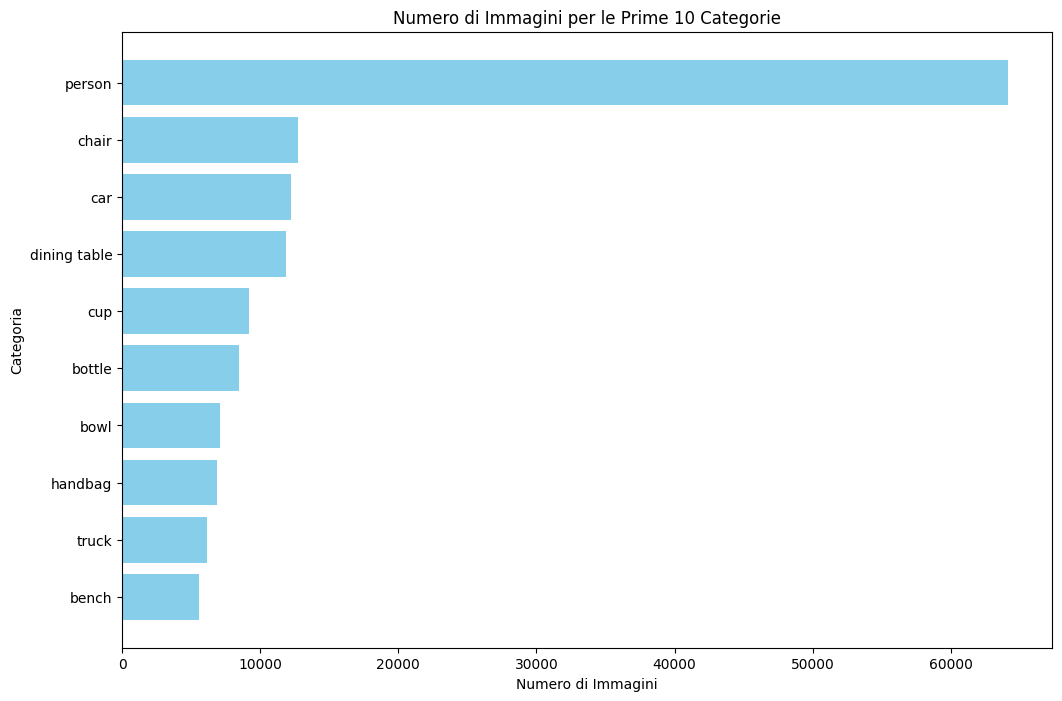

In [22]:
# Definisci il numero di categorie da visualizzare
top_n = 10  # Puoi cambiare questo valore a tuo piacimento

# Seleziona le prime 'top_n' categorie
category_image_counts_top_n_df = category_image_counts_df.head(top_n)

# Grafico delle immagini per le prime 'top_n' categorie
plt.figure(figsize=(12, 8))
plt.barh(category_image_counts_top_n_df['Categoria'], category_image_counts_top_n_df['Numero di Immagini'], color='skyblue')
plt.xlabel('Numero di Immagini')
plt.ylabel('Categoria')
plt.title(f'Numero di Immagini per le Prime {top_n} Categorie')
plt.gca().invert_yaxis()
plt.show()

